In [1]:
import sqlite3
from typing import Dict
from render import * 
import db as database
from jinja2 import Environment, PackageLoader, select_autoescape
import pandas as pd

In [2]:
import importlib

In [3]:
importlib.reload(database)

<module 'db' from '/data/sss/f/tt/Stock/db.py'>

In [4]:
db = sqlite3.connect("stock.db")


In [5]:
krx = database.GetAllKRXCorp(db)

In [6]:
krxDf = pd.DataFrame([corp.toDict() for corp in krx])

In [27]:
data = GetStockPriceFrom(db,"294870", 61)


In [28]:
s = pd.DataFrame(data, columns=[s for s in database.STOCK_INDEX.__members__.keys()])

In [29]:
s.set_index("DATE", inplace=True)

In [30]:
stock = s

In [31]:
stock

CODE  CLOSE  DIFF   OPEN   HIGH    LOW   VOLUME
DATE                                                         
2022-06-03  294870  13700   100  13700  13800  13600   175508
2022-06-02  294870  13600   250  13850  13850  13550   350113
2022-05-31  294870  13850    50  13850  13950  13800   276819
2022-05-30  294870  13800   100  13850  13950  13750   191087
2022-05-27  294870  13700   150  14050  14100  13600   392051
...            ...    ...   ...    ...    ...    ...      ...
2022-03-15  294870  16200   200  14800  16450  14750  2701677
2022-03-14  294870  16400  2050  18500  19250  16000  4436719
2022-03-11  294870  18450   100  18450  18500  18000   997048
2022-03-10  294870  18350  1400  17450  18350  17400  1754702
2022-03-08  294870  16950   450  17100  17500  16800   878964

[61 rows x 7 columns]

In [52]:
volume = stock["VOLUME"]
volume

DATE
2022-06-03     175508
2022-06-02     350113
2022-05-31     276819
2022-05-30     191087
2022-05-27     392051
               ...   
2022-03-15    2701677
2022-03-14    4436719
2022-03-11     997048
2022-03-10    1754702
2022-03-08     878964
Name: VOLUME, Length: 61, dtype: int64

In [62]:
biggerThanYesterday = stock["CLOSE"].shift(-1) < stock["CLOSE"]
biggerThanYesterday

DATE
2022-06-03     True
2022-06-02    False
2022-05-31     True
2022-05-30     True
2022-05-27    False
              ...  
2022-03-15    False
2022-03-14    False
2022-03-11     True
2022-03-10     True
2022-03-08    False
Name: CLOSE, Length: 61, dtype: bool

In [63]:
ObvWeight = biggerThanYesterday.map(lambda x: 1 if x else -1)
ObvWeight

In [66]:
factor = volume * ObvWeight
factor

DATE
2022-06-03     175508
2022-06-02    -350113
2022-05-31     276819
2022-05-30     191087
2022-05-27    -392051
               ...   
2022-03-15   -2701677
2022-03-14   -4436719
2022-03-11     997048
2022-03-10    1754702
2022-03-08    -878964
Length: 61, dtype: int64

In [71]:
obv = factor.iloc[::-1].cumsum().iloc[::-1]
obv

DATE
2022-06-03   -1804451
2022-06-02   -1979959
2022-05-31   -1629846
2022-05-30   -1906665
2022-05-27   -2097752
               ...   
2022-03-15   -5265610
2022-03-14   -2563933
2022-03-11    1872786
2022-03-10     875738
2022-03-08    -878964
Length: 61, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

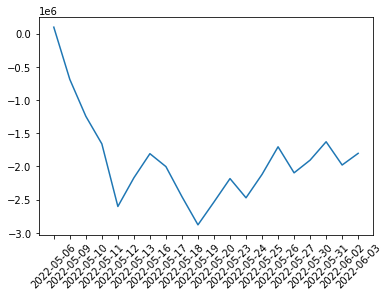

In [73]:
plt.plot(obv.iloc[:20].iloc[::-1])
plt.xticks(rotation = 45)

In [32]:
d5 = stock["CLOSE"].loc[::-1].rolling(window=5
        ).mean().dropna().loc[::-1]
d20 = stock["CLOSE"].loc[::-1].rolling(window=20
        ).mean().dropna().loc[::-1]
d60 = stock["CLOSE"].loc[::-1].rolling(window=60
        ).mean().dropna().loc[::-1]

In [41]:
ewm5 =  stock["CLOSE"].loc[::-1].ewm(span=5).mean().loc[::-1]
ewm10 =  stock["CLOSE"].loc[::-1].ewm(span=10).mean().loc[::-1]
macd = (ewm5 - ewm10)
signal = macd.loc[::-1].ewm(span=4).mean().loc[::-1]

In [48]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

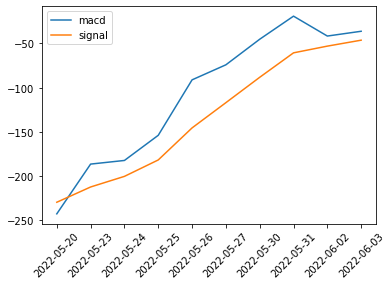

In [51]:
plt.plot(macd.iloc[0:10].iloc[::-1],label="macd")
plt.legend()
plt.plot(signal.iloc[0:10].iloc[::-1],label="signal")
plt.legend()
plt.xticks(rotation=45)

In [17]:
from gen import *

In [16]:
dataStore = DataStore()
krx_corps = dataStore.getAllKRXCorp()

In [18]:
collector = OutputCollector()
prepareCollector(collector)

In [19]:
for corp in tqdm.tqdm(krx_corps):
    for nday in range(0, 5):
        collect(dataStore, collector, corp, nday)
    dataStore.clearCache()

100%|██████████| 2564/2564 [01:10<00:00, 36.62it/s] 


['2022-05-27',
 '2022-06-02',
 '2022-05-31',
 '2022-05-30',
 '2021-04-14',
 '2022-05-04',
 '2022-01-28',
 '2022-05-16',
 '2021-07-05',
 '2022-02-10']